In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
# COPIED
import sys
import os
PROJECT_HOME = os.path.join(os.getcwd(), '..')
if PROJECT_HOME not in sys.path:
    sys.path.append(PROJECT_HOME)
# PROJECT DEPS
from src.utils import load_dataframe, n_random, transform_dataset
from src.processing import isolate, process
# %matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

train_df = load_dataframe('train')
test_df = load_dataframe('test')

BAND_1 = 'band_1'
BAND_2 = 'band_2'

HEIGHT=75
WIDTH=75

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
transform_dataset(train_df.iloc[:5])

(5, 2, 75, 75)

In [121]:
process(transform_dataset(train_df.iloc[:5]), isolate).shape

(5, 75, 75, 4)

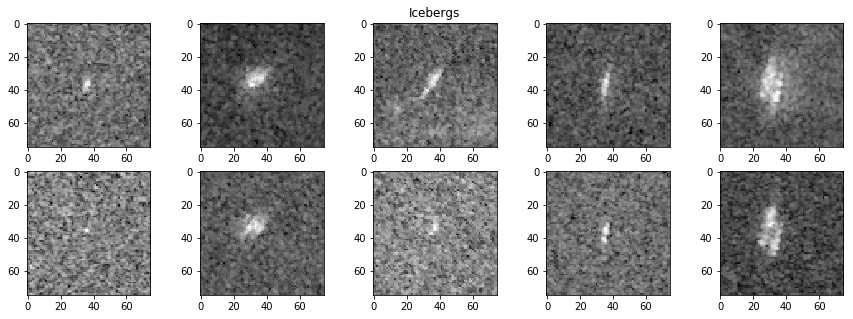

In [122]:
# def band_to_array(band):
#     return np.array(band).reshape((HEIGHT, WIDTH))
dt = process(transform_dataset(train_df), isolate)
five_icebergs = dt[train_df['is_iceberg'] == 1][:5]
five_ships = dt[train_df['is_iceberg'] == 0][:5]

plot_size = (15, 5)
rows = 2
columns = 5

fig, ax = plt.subplots(rows, columns, figsize=plot_size)
ax[0][2].set_title("Icebergs")
for i, band in enumerate(five_icebergs):
    ax[0][i].imshow(band[:, :, 0])
    ax[1][i].imshow(band[:, :, 1])
    
# fig, ax = plt.subplots(rows, columns, figsize=plot_size)
# ax[0][2].set_title("Ships")
# for i, (band_1, band_2, im_id, angle, is_iceberg) in enumerate(five_ships.values):
#     ax[0][i].imshow(band_to_array(band_1))
#     ax[1][i].imshow(band_to_array(band_2))

In [58]:
np.apply_over_axes(isolate_bands, dt, [0])

TypeError: isolate_bands() takes 1 positional argument but 2 were given

(1604, 2, 75, 75)

In [67]:
np.vstack?

KeyboardInterrupt: 

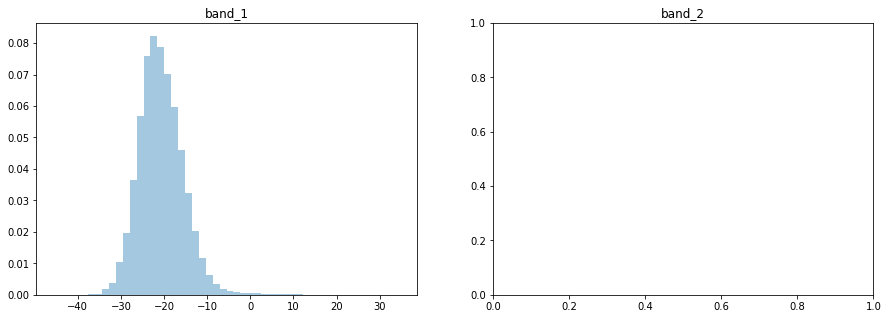

In [49]:
fig, ax = plt.subplots(1, 2, figsize=plot_size)
ax[0].set_title(BAND_1)
ax[1].set_title(BAND_2)
sns.distplot(np.hstack(train_df[BAND_1].values), ax=ax[0])
sns.distplot(np.hstack(train_df[BAND_2].values), ax=ax[1])

In [4]:
import src.models.simple_keras_model

/Users/ozeron/.virtualenvs/kaggle-p3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/ozeron/.virtualenvs/kaggle-p3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


/Users/ozeron/code/kaggle-statoil-iceberg-classifier-challenge


KeyboardInterrupt: 